In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv('/content/monthly-milk-production-pounds.csv')
data

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [ ]:
data=pd.read_csv('/content/monthly-milk-production-pounds.csv',index_col='Month',parse_dates=True)
data

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0
...,...
1975-09,817.0
1975-10,827.0
1975-11,797.0


In [ ]:
data.tail(20)

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1974-06,947.0
1974-07,908.0
1974-08,867.0
1974-09,815.0
1974-10,812.0
1974-11,773.0
1974-12,813.0
1975-01,834.0
1975-02,782.0


<Axes: xlabel='Month'>

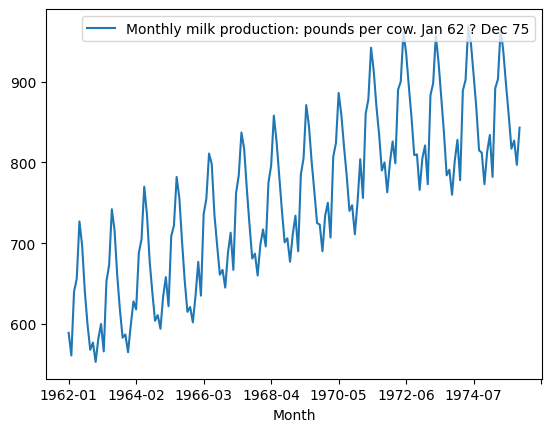

In [ ]:
data.plot()

In [ ]:
scalar=MinMaxScaler()
traindata=data[:84]
testdata=data[84:]

In [ ]:
scaledtraindata=scalar.fit_transform(traindata)
scaledtestdata=scalar.fit_transform(testdata)

In [ ]:
n_inputs=12
n_features=1
generator=TimeseriesGenerator(scaledtraindata,scaledtraindata,length=12,batch_size=1)


In [ ]:
x,y=generator[0]
print(x.flatten(),y)

[0.11803279 0.02622951 0.2852459  0.33770492 0.5704918  0.47213115
 0.2852459  0.15081967 0.04918033 0.07868852 0.         0.09508197] [[0.15409836]]


In [ ]:
x,y=generator[1]
print(x.flatten(),y)

[0.02622951 0.2852459  0.33770492 0.5704918  0.47213115 0.2852459
 0.15081967 0.04918033 0.07868852 0.         0.09508197 0.15409836] [[0.04262295]]


In [ ]:
x,y=generator[2]
print(x.flatten(),y)

[0.2852459  0.33770492 0.5704918  0.47213115 0.2852459  0.15081967
 0.04918033 0.07868852 0.         0.09508197 0.15409836 0.04262295] [[0.32786885]]


In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(12,1)))
model.add(Dense(1,activation='tanh'))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Trained_history=model.fit(generator,epochs=20)

Epoch 1/20
72/72 [==============================] - 2s 9ms/step - loss: 0.0703
Epoch 2/20
72/72 [==============================] - 1s 9ms/step - loss: 0.0386
Epoch 3/20
72/72 [==============================] - 1s 9ms/step - loss: 0.0334
Epoch 4/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0206
Epoch 5/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0172
Epoch 6/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0073
Epoch 7/20
72/72 [==============================] - 1s 18ms/step - loss: 0.0062
Epoch 8/20
72/72 [==============================] - 1s 9ms/step - loss: 0.0069
Epoch 9/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0084
Epoch 10/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0047
Epoch 11/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0051
Epoch 12/20
72/72 [==============================] - 1s 9ms/step - loss: 0.0047
Epoch 13/20
72/72 [=============================

In [ ]:
hist=Trained_history.history
hist.keys()

dict_keys(['loss'])

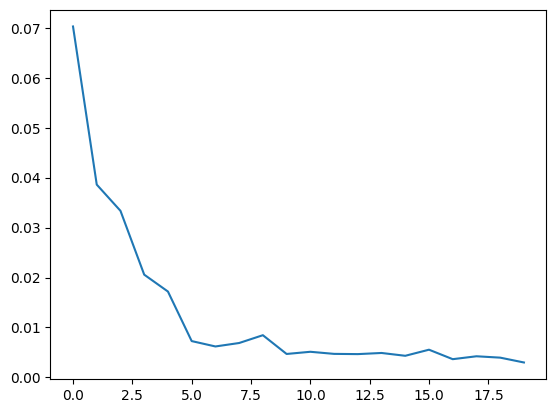

In [ ]:
loss=model.history.history['loss']
plt.plot(range(len(loss)),loss)

In [ ]:
test_prediction=[]
first_batch=scaledtraindata[-n_inputs:]
current_batch=first_batch.reshape(1,12,1)
for i in range(len(testdata)):
  current_pred=model.predict(current_batch)[0]
  print(current_pred)
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 317ms/step
[0.51829296]
1/1 [==============================] - 0s 32ms/step
[0.55614895]
1/1 [==============================] - 0s 38ms/step
[0.7189681]
1/1 [==============================] - 0s 38ms/step
[0.8285402]
1/1 [==============================] - 0s 38ms/step
[0.91645026]
1/1 [==============================] - 0s 34ms/step
[0.86876655]
1/1 [==============================] - 0s 34ms/step
[0.7715302]
1/1 [==============================] - 0s 32ms/step
[0.63773656]
1/1 [==============================] - 0s 41ms/step
[0.5232337]
1/1 [==============================] - 0s 33ms/step
[0.48946065]
1/1 [==============================] - 0s 38ms/step
[0.4555706]
1/1 [==============================] - 0s 39ms/step
[0.49407434]
1/1 [==============================] - 0s 35ms/step
[0.51805073]
1/1 [==============================] - 0s 36ms/step
[0.58454764]
1/1 [==============================] - 0s 46ms/step
[0.71586424]
1/1 [========================

In [ ]:
true_pred=scalar.inverse_transform(test_prediction)
print(true_pred)

[[834.60373682]
 [845.16555601]
 [890.59209806]
 [921.16271746]
 [945.68962312]
 [932.3858664 ]
 [905.25692886]
 [867.92849994]
 [835.98220557]
 [826.55952054]
 [817.10419974]
 [827.84674215]
 [834.53615373]
 [853.08879125]
 [889.72612327]
 [918.01731026]
 [933.79024422]
 [928.03014994]
 [907.79001403]
 [873.92638224]
 [842.4050265 ]
 [826.96262437]
 [821.23625511]
 [825.95227057]
 [835.02917433]
 [855.47940981]
 [887.21083188]
 [912.90728742]
 [926.1987049 ]
 [924.98189342]
 [909.39760673]
 [879.06068444]
 [847.28343093]
 [828.44474602]
 [822.82634506]
 [825.38558874]
 [834.91090393]
 [855.04743683]
 [883.42794192]
 [907.65496427]
 [920.57271248]
 [922.54032147]
 [910.5664748 ]
 [883.41879559]
 [851.4280833 ]
 [830.28154582]
 [823.62915194]
 [825.00425318]
 [834.07113755]
 [853.04196203]
 [878.94929874]
 [902.57356113]
 [916.11622006]
 [920.41374922]
 [911.45475   ]
 [887.13433528]
 [855.25158298]
 [832.35151058]
 [824.07198411]
 [824.52935895]
 [832.69070649]
 [850.17136055]
 [874.28

In [ ]:
test_data_inverse=scalar.inverse_transform(scaledtestdata)
print(test_data_inverse)

[[734.]
 [690.]
 [785.]
 [805.]
 [871.]
 [845.]
 [801.]
 [764.]
 [725.]
 [723.]
 [690.]
 [734.]
 [750.]
 [707.]
 [807.]
 [824.]
 [886.]
 [859.]
 [819.]
 [783.]
 [740.]
 [747.]
 [711.]
 [751.]
 [804.]
 [756.]
 [860.]
 [878.]
 [942.]
 [913.]
 [869.]
 [834.]
 [790.]
 [800.]
 [763.]
 [800.]
 [826.]
 [799.]
 [890.]
 [900.]
 [961.]
 [935.]
 [894.]
 [855.]
 [809.]
 [810.]
 [766.]
 [805.]
 [821.]
 [773.]
 [883.]
 [898.]
 [957.]
 [924.]
 [881.]
 [837.]
 [784.]
 [791.]
 [760.]
 [802.]
 [828.]
 [778.]
 [889.]
 [902.]
 [969.]
 [947.]
 [908.]
 [867.]
 [815.]
 [812.]
 [773.]
 [813.]
 [834.]
 [782.]
 [892.]
 [903.]
 [966.]
 [937.]
 [896.]
 [858.]
 [817.]
 [827.]
 [797.]
 [843.]
 [ nan]]


In [ ]:
df=pd.DataFrame({'truevalue':test_data_inverse[:,0],'predictedvalue':true_pred[:,0]})
print(df)

    truevalue  predictedvalue
0       734.0      834.603737
1       690.0      845.165556
2       785.0      890.592098
3       805.0      921.162717
4       871.0      945.689623
..        ...             ...
80      817.0      862.808300
81      827.0      837.059361
82      797.0      824.822175
83      843.0      823.286281
84        NaN      829.089953

[85 rows x 2 columns]


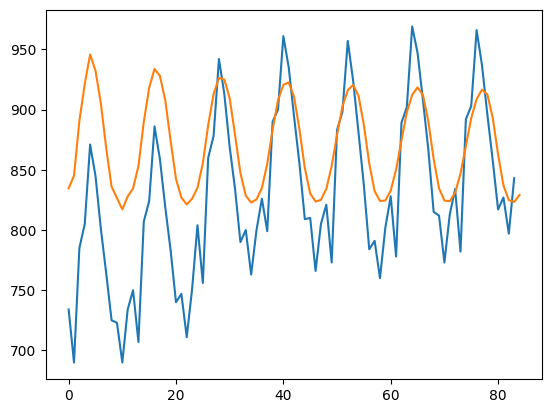

In [ ]:
plt.plot(df['truevalue'])
plt.plot(df['predictedvalue'])